# Dynamics of scalar-modulated system

Dynamics equation:

$\dot{x}(x, t) = a(t)b(x) + c(x); \;\; x(0) = 0$

Goal: stabilize arbitrary increasing trajectory $x^*(t); \;  x^*(0) = 0$.

## Sufficient conditions for stability

1. $dx^*/dt(t) \equiv v^*(t) = \dot{x}(x^*(t), t) = a(t)b(x^*(t)) + c(x^*(t))$ for all $t$.
2. $\dot{x}(x^*(t) + \Delta, t) = a(t)b(x^*(t) + \Delta) + c(x^*(t) + \Delta) \leq v^*(t)$... i.e. advanced trajectories slow down.
3. $\dot{x}(x^*(t) - \Delta, t) = a(t)b(x^*(t) - \Delta) + c(x^*(t) - \Delta) \geq v^*(t)$... i.e. delayed trajectories speed up.

## Candidate recipe for stabilizing through scalar modulation:

Choose $a(t)$ fluctuating approx on timescale of expected timing errors to correct.

Pick any $b(x^*(t))$ same sign as $da/dt(t)$ for all $t$.

Pick $c(x^*(t))$ s.t. $\dot{x}^*(t) = a(t)b(x^*(t)) + c(x^*(t))$ for all $t$.

# Example

Constant speed trajectory, sinusoidal modulation:

$x^*(t) = t$

$a(t) = cos(t)$

$b(x) = -sin(x)$

$c(x) = sin(x)cos(x) + 1$


 Random
 t_0 0.00, x_0 0.00; t_0 0.50, x_0 0.00; t_0 0.00, x_0 0.50; t_0 1.00, x_0 0.00; t_0 0.00, x_0 1.00; t_0 1.50, x_0 0.00; t_0 0.00, x_0 1.50; t_0 2.00, x_0 0.00; t_0 0.00, x_0 2.00;
 Sinusoidal
 t_0 0.00, x_0 0.00; t_0 0.50, x_0 0.00; t_0 0.00, x_0 0.50; t_0 1.00, x_0 0.00; t_0 0.00, x_0 1.00; t_0 1.50, x_0 0.00; t_0 0.00, x_0 1.50; t_0 2.00, x_0 0.00; t_0 0.00, x_0 2.00;
 Matched random
 t_0 0.00, x_0 0.00; t_0 0.50, x_0 0.00; t_0 0.00, x_0 0.50; t_0 1.00, x_0 0.00; t_0 0.00, x_0 1.00; t_0 1.50, x_0 0.00; t_0 0.00, x_0 1.50; t_0 2.00, x_0 0.00; t_0 0.00, x_0 2.00;

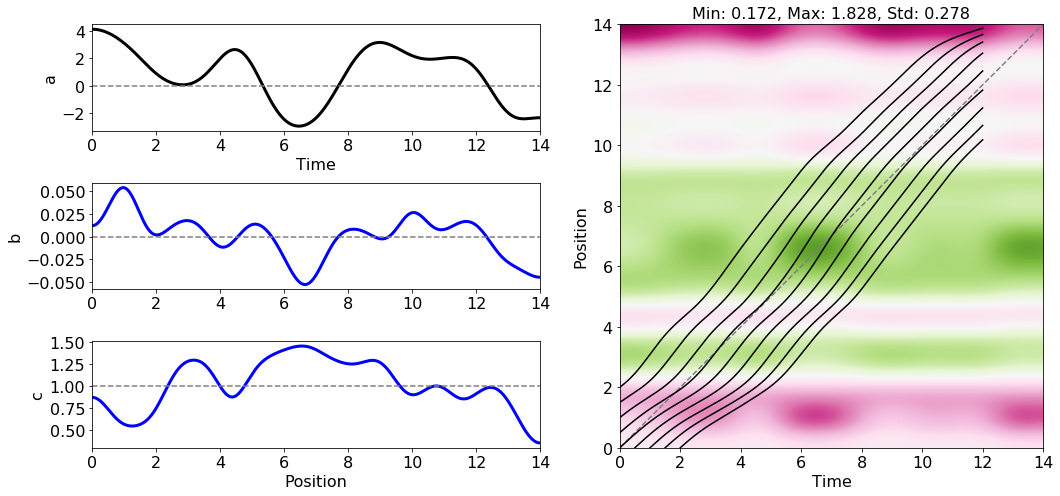

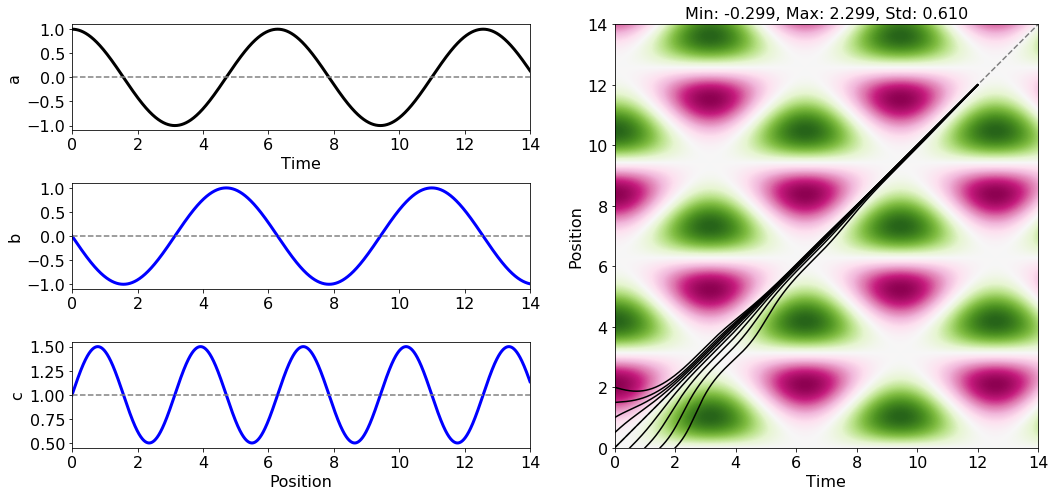

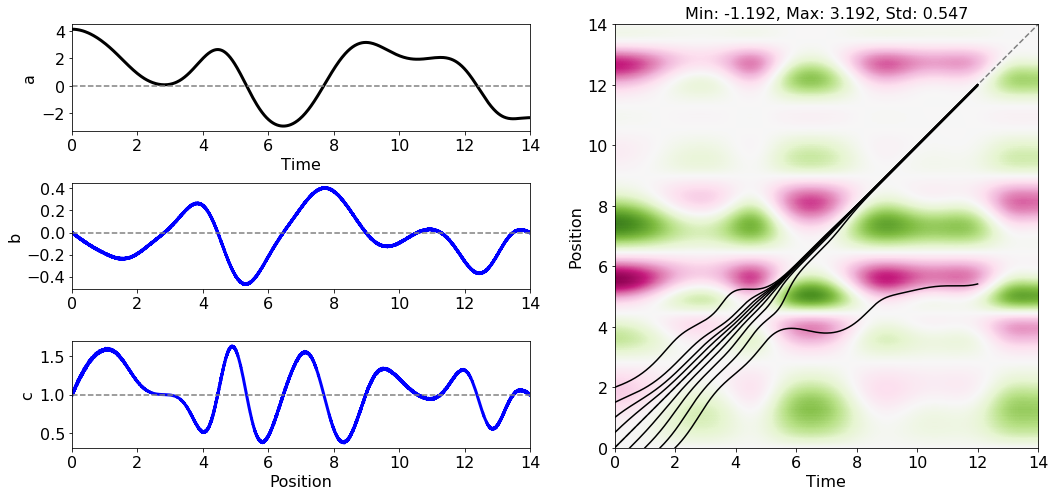

In [1]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d as smooth
import sys

from aux import Generic, get_idx
from disp import set_font_size


DT = .001
DX = .001

T_MAX = 14
X_MAX = 14

T_STOP = 12

np.random.seed(1)

t = np.arange(0, T_MAX, DT)
x = np.arange(0, X_MAX, DX)

# sample modulation timecourse and spatial profile
p = [
    Generic(label='Random',
        a_arr=100*smooth(np.random.normal(0, 1, len(t)), .75/DT),
        b_arr=smooth(np.random.normal(0, 1, len(x)), .5/DX),
        c_arr=10*smooth(np.random.normal(0, 1, len(x)), .5/DX) + 1
    ),
    Generic(label='Sinusoidal',
        a_arr=np.cos(t),
        b_arr=-np.sin(x),
        c_arr=np.sin(x)*np.cos(x)+1,
    ),
]

b_arr_matched = .1 * np.gradient(p[0].a_arr, DT)
c_arr_matched = 1 - p[0].a_arr*b_arr_matched

p.append(Generic(label='Matched random', a_arr=p[0].a_arr, b_arr=b_arr_matched, c_arr=c_arr_matched))

# loop over modulation types
for _p in p:

    print('\n', _p.label)
    a_arr = _p.a_arr
    b_arr = _p.b_arr
    c_arr = _p.c_arr


    # make funcs for getting nearest value
    def a(t_samp):
        return a_arr[get_idx(t_samp, 0, DT, len(t))]

    def b(x_samp):
        return b_arr[get_idx(x_samp, 0, DX, len(x))]

    def c(x_samp):
        return c_arr[get_idx(x_samp, 0, DX, len(x))]


    fig = plt.figure(figsize=(15, 7), tight_layout=True)
    gs = gridspec.GridSpec(3, 2)
    axs = [
        fig.add_subplot(gs[0, 0]),
        fig.add_subplot(gs[1, 0]),
        fig.add_subplot(gs[2, 0]),
        fig.add_subplot(gs[:, 1])
    ]

    # plot modulation time course
    axs[0].plot(t, a(t), c='k', lw=3)
    axs[0].axhline(0, color='gray', ls='--')
    axs[0].set_xlim(0, T_MAX)

    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('a')

    # plot modulation spatial profile
    axs[1].plot(x, b(x), c='b', lw=3)
    axs[1].axhline(0, color='gray', ls='--')
    axs[1].set_xlim(0, X_MAX)
    axs[1].set_ylabel('b')

    axs[2].plot(x, c(x), c='b', lw=3)
    axs[2].axhline(1, color='gray', ls='--')
    axs[2].set_xlim(0, X_MAX)
    axs[2].set_xlabel('Position')
    axs[2].set_ylabel('c')

    # plot modulation landscape
    t2v = b_arr[:, None] @ a_arr[None, :] + np.tile(c_arr[:, None], (1, len(t)))
    v_diff_u = t2v.max() - 1
    v_diff_l = 1 - t2v.min()

    if v_diff_u > v_diff_l:
        v_min = 1 - v_diff_u
        v_max = 1 + v_diff_u
    else:
        v_min = 1 - v_diff_l
        v_max = 1 + v_diff_l

    axs[3].imshow(t2v, origin='lower', cmap='PiYG', vmin=v_min, vmax=v_max, extent=[0, T_MAX, 0, X_MAX])

    axs[3].plot([0, T_MAX], [0, T_MAX], c='gray', ls='--')
    axs[3].set_xlabel('Time')
    axs[3].set_ylabel('Position')
    axs[3].set_title('Min: {0:.3f}, Max: {1:.3f}, Std: {2:.3f}'.format(v_min, v_max, t2v.std()))


    # run simulations
    t_0_x_0 = [
        (0, 0),
        (.5, 0),
        (0, .5),
        (1, 0),
        (0, 1),
        (1.5, 0),
        (0, 1.5),
        (2, 0),
        (0, 2),
    ]

    for _t_0, _x_0 in t_0_x_0:
        sys.stdout.write(' t_0 {0:.2f}, x_0 {1:.2f};'.format(_t_0, _x_0))

        t_trl = np.arange(_t_0, T_STOP, DT)
        x_trl = np.nan * np.zeros(len(t_trl))

        x_trl[0] = _x_0

        for ct, _t in enumerate(t_trl[1:], 1):

            _x = x_trl[ct-1]

            _v = a(_t)*b(_x) + c(_x)
            x_trl[ct] = _x + _v*DT

        axs[3].plot(t_trl, x_trl, c='k')

    for ax in axs:
        set_font_size(ax, 16)